# Pyspark analizar datos de Youtube

Instalar Spark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
import findspark
findspark.init()

Crear sesión de trabajo

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

In [0]:
from __future__ import print_function
import sys
from operator import add
from pyspark.sql import SparkSession
from pyspark.sql.types import *

Cargar los datos

In [5]:
from google.colab import files
files.upload()

Saving youtubedata.txt to youtubedata.txt


{'youtubedata.txt': b'QuRYeRnAuXM\tEvilSquirrelPictures\t1135\tPets & Animals\t252\t1075\t4.96\t46\t86\tgFa1YMEJFag\tnRcovJn9xHg\t3TYqkBJ9YRk\trSJ8QZWBegU\t0TZqX5MbXMA\tUEvVksP91kg\tZTopArY7Nbg\t0RViGi2Rne8\tHT_QlOJbDpg\tYZev1imoxX8\t8qQrrfUTmh0\tzQ83d_D2MGs\tu6_DQQjLsAw\t73Wz9CQFDtE\r\n3TYqkBJ9YRk\thggh22\t1135\tComedy\t169\t228\t5\t5\t3\tQuRYeRnAuXM\tgFa1YMEJFag\tUEvVksP91kg\trSJ8QZWBegU\tnRcovJn9xHg\tsVkuOk4jmCo\tZTopArY7Nbg\tHT_QlOJbDpg\t0RViGi2Rne8\tShhClb6J-NA\tg9e1alirMhc\tYZev1imoxX8\tI4yKEK9o8gA\tzQ83d_D2MGs\t1GKaVzNDbuI\tyuZhwV24PmM\tDomumdGQSg8\thiSmlmXp-aU\tpFUYi7dp1WU\t2l6vwAIAqNU\r\nrSJ8QZWBegU\tTimeGem\t1135\tEntertainment\t95\t356\t4.31\t13\t1\tQuRYeRnAuXM\tgFa1YMEJFag\tUEvVksP91kg\t3TYqkBJ9YRk\tnRcovJn9xHg\tsVkuOk4jmCo\tZTopArY7Nbg\tgBcu22Vv1nY\tHT_QlOJbDpg\t0RViGi2Rne8\tShhClb6J-NA\tg9e1alirMhc\tYZev1imoxX8\tI4yKEK9o8gA\tzQ83d_D2MGs\t1GKaVzNDbuI\tyuZhwV24PmM\tDomumdGQSg8\thiSmlmXp-aU\tpFUYi7dp1WU\r\nnRcovJn9xHg\twooochacha\t1135\tEntertainment\t118\t1115\t2.23\t57\t73

Descripcion de 10 de las 23 columnas:

Column no. 1: Video id. \\
Column no. 2: Video uploader. \\
Column no. 3: Interval between the day of establishment of YouTube and the date of uploading of the video. \\
Column no. 4: Category of the video. \\
Column no. 5: Length of the video. \\
Column no. 6: Number of views for the video. \\
Column no. 7: Rating on the video. \\
Column no. 8: Number of ratings given for the video \\
Column no. 9: Number of comments on the videos. \\
Column no. 10: Related video ids of the uploaded video





In [0]:
#file_path = '/content/drive/My Drive/PySpark Turorial/youtubedata.txt'

Como los datos no tienen encabezado los estructuramos usando nombres genéricos

In [0]:
schema1 = StructType([
    StructField("f1", StringType(), True),
    StructField("f2", StringType(), True),
    StructField("f3", DoubleType(), True),
    StructField("f4", StringType(), True),
    StructField("f5", DoubleType(), True),
    StructField("f6", DoubleType(), True),
    StructField("f7", DoubleType(), True),
    StructField("f8", DoubleType(), True),
    StructField("f9", DoubleType(), True),
    StructField("f10", StringType(), True),
    StructField("f11", StringType(), True),
    StructField("f12", StringType(), True),
    StructField("f13", StringType(), True),
    StructField("f14", StringType(), True),
    StructField("f15", StringType(), True),
    StructField("f16", StringType(), True),
    StructField("f17", StringType(), True),
    StructField("f18", StringType(), True),
    StructField("f19", StringType(), True),
    StructField("f20", StringType(), True),
    StructField("f21", StringType(), True),
    StructField("f22", StringType(), True),
    StructField("f23", StringType(), True)])

Leer los datos con el esquema creado

In [0]:
df_read = spark.read \
 .option("delimiter", "\t") \
 .schema(schema1) \
 .option("inferSchema", "True") \
 .csv('youtubedata.txt')
df_read.createOrReplaceTempView("youtube_data")

In [8]:
df_read.printSchema() 

root
 |-- f1: string (nullable = true)
 |-- f2: string (nullable = true)
 |-- f3: double (nullable = true)
 |-- f4: string (nullable = true)
 |-- f5: double (nullable = true)
 |-- f6: double (nullable = true)
 |-- f7: double (nullable = true)
 |-- f8: double (nullable = true)
 |-- f9: double (nullable = true)
 |-- f10: string (nullable = true)
 |-- f11: string (nullable = true)
 |-- f12: string (nullable = true)
 |-- f13: string (nullable = true)
 |-- f14: string (nullable = true)
 |-- f15: string (nullable = true)
 |-- f16: string (nullable = true)
 |-- f17: string (nullable = true)
 |-- f18: string (nullable = true)
 |-- f19: string (nullable = true)
 |-- f20: string (nullable = true)
 |-- f21: string (nullable = true)
 |-- f22: string (nullable = true)
 |-- f23: string (nullable = true)



In [0]:
df1 = spark.sql('''select f1 as vdo_id, f2 as vdo_uploader, f3 as vdo_interval, f4 as vdo_category, f5 vdo_length, f6 as vdo_views, f7 as vdo_rating, f8 as vdo_num_rating , f9 as vdo_comm, f10  as vdo_rel_id from youtube_data''')

df1.createOrReplaceTempView("col_4")

Top de categorías con el número máximo de videos subidos

In [10]:
df2 = spark.sql('''select vdo_category, COUNT(vdo_category) category_count from col_4 group by vdo_category order by category_count DESC''')


df2.show()

+--------------------+--------------+
|        vdo_category|category_count|
+--------------------+--------------+
|       Entertainment|           908|
|               Music|           862|
|              Comedy|           414|
|      People & Blogs|           398|
|     News & Politics|           333|
|    Film & Animation|           260|
|              Sports|           251|
|       Howto & Style|           137|
|     Travel & Events|           112|
|      Pets & Animals|            95|
|Science & Technology|            80|
|    Autos & Vehicles|            77|
|           Education|            65|
|Nonprofits & Acti...|            42|
|                UNA |            32|
|                null|             0|
+--------------------+--------------+



Videos mejor calificados 

In [11]:
df3 = spark.sql('''select distinct vdo_id, vdo_rating from col_4 order by vdo_rating DESC''')
df3.show()

+-----------+----------+
|     vdo_id|vdo_rating|
+-----------+----------+
|6dKyQ7OrEgM|       5.0|
|zc9jIxubJ6I|       5.0|
|sGEkP1F-tgQ|       5.0|
|hpez2qiTjH8|       5.0|
|5R5oh8AIguE|       5.0|
|NdQgIVkMINc|       5.0|
|pWOMN2neHdg|       5.0|
|Kj7LkIXS4dw|       5.0|
|ZEDYzwdqHrU|       5.0|
|Bdvhh1GDfW4|       5.0|
|smGcj6vohLs|       5.0|
|goJJE3PqTnk|       5.0|
|cvd-OyHm9lE|       5.0|
|GfHs7xrPRsE|       5.0|
|RN-CQVhgRDc|       5.0|
|tI9guk2C3P8|       5.0|
|a8Ist4c9S3Q|       5.0|
|nMdp_QiA62E|       5.0|
|Y_hAXbgxXp8|       5.0|
|m7-ScnsMQek|       5.0|
+-----------+----------+
only showing top 20 rows



Videos con el máximo número de comentarios

In [12]:
df4 = spark.sql('''select vdo_id, vdo_comm from col_4 order by vdo_comm DESC''')
df4.show()

+-----------+--------+
|     vdo_id|vdo_comm|
+-----------+--------+
|kHmvkRoEowc|259683.0|
|EwTZ2xpQwpA|129200.0|
|4DC4Rb9quKk| 50036.0|
|Qit3ALTelOo| 39418.0|
|UW_1CvDFYVg| 33543.0|
|rZBA0SKmQy8| 30666.0|
|GfPJeDssBOM| 29786.0|
|irp8CNj9qBI| 29330.0|
|eBGIQ7ZuuiU| 29160.0|
|LTxO_pgMqys| 26192.0|
|yGMKgLRU-3c| 25155.0|
|LU8DDYz68kM| 24004.0|
|HPPj6viIBmU| 22567.0|
|2x2W12A8Qow| 21323.0|
|3QL97xldoXc| 19461.0|
|edLR8fj6roo| 19161.0|
|Rp198k984Yw| 18443.0|
|Md6rURKhZmA| 17731.0|
|EBM854BTGL0| 17602.0|
|-hXKRilPNpc| 17000.0|
+-----------+--------+
only showing top 20 rows



A visualizar

In [0]:
import matplotlib.pyplot as plt
import csv
from pandas import DataFrame


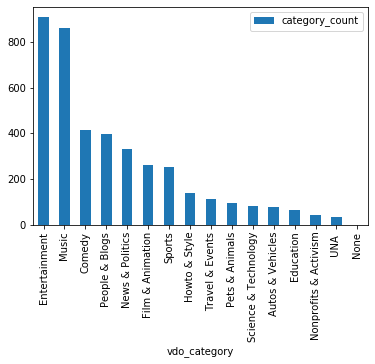

In [14]:
df2_p = df2.toPandas()

#df2
df2_p.plot('vdo_category', 'category_count', kind='bar')

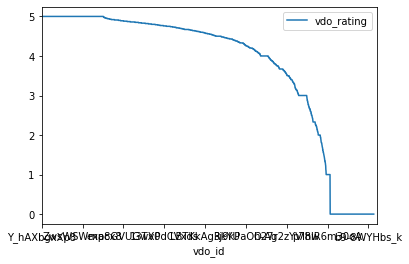

In [15]:
df3_p = df3.toPandas()

#df3
df3_p.plot('vdo_id', 'vdo_rating', kind='line')